## Regressão Linear

### Estimar o retorno do Ibovespa a partir dos retornos percentuais de algumas ações

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\juini\anaconda3\envs\py38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df = pd.DataFrame()

symbols = ['ITUB4.SA','BBDC4.SA','PETR4.SA','VALE3.SA','ABEV3.SA','^BVSP']

for ticker in symbols: 
    r = web.DataReader(ticker, "yahoo")[['Close']].pct_change()
    df[ticker + 'Return'] = r['Close']

df['alvo'] = df['^BVSPReturn'].shift(-1)

df.dropna(inplace=True)
df.head()


,ITUB4.SAReturn,BBDC4.SAReturn,PETR4.SAReturn,VALE3.SAReturn,ABEV3.SAReturn,^BVSPReturn,alvo
Date,,,,,,,
2015-09-22,0.009550,0.003984,-0.045206,-0.023583,0.003621,-0.006976,-0.019994
2015-09-23,-0.039650,-0.033921,-0.021521,-0.028777,-0.011856,-0.019994,-0.001059
2015-09-24,0.011363,0.011857,0.020528,-0.023809,-0.002608,-0.001059,-0.010178
2015-09-25,-0.024342,-0.022983,-0.020115,-0.028184,0.009414,-0.010178,-0.019495
2015-09-28,-0.000766,-0.024908,-0.055718,-0.074735,-0.001036,-0.019495,0.003981


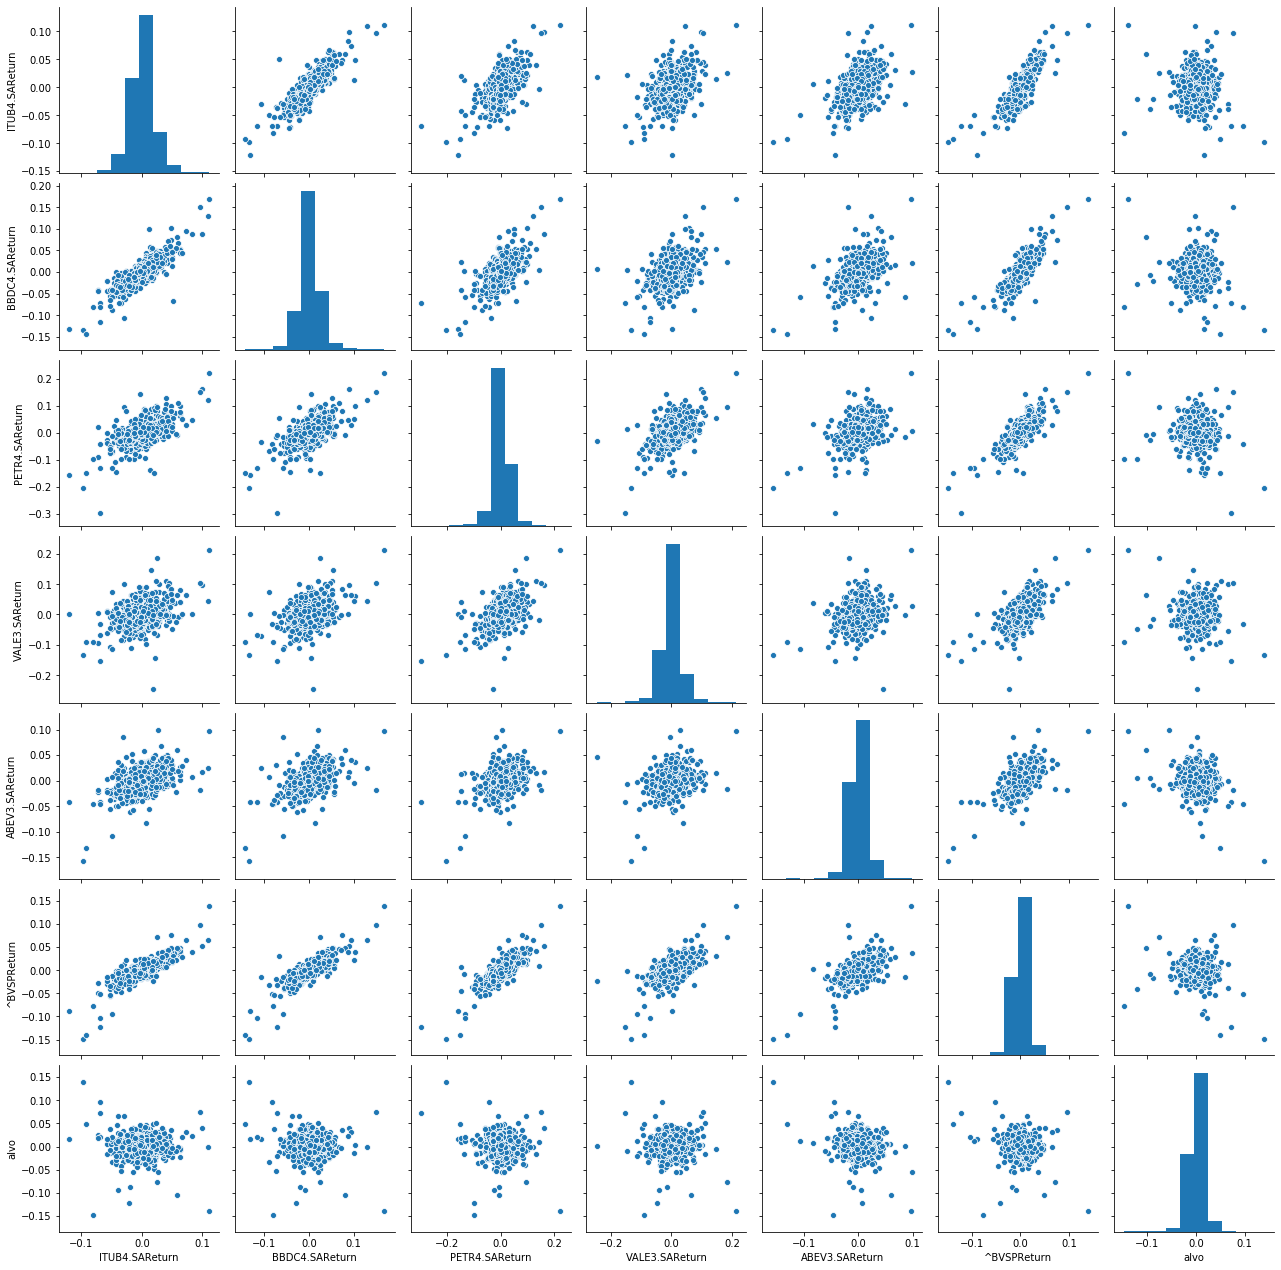

In [3]:
sns.pairplot(df)

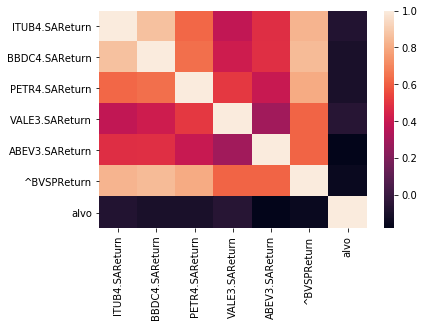

In [4]:
sns.heatmap(df.corr())

In [5]:
X = df.drop(['^BVSPReturn','alvo'], axis=1)

y = df[['alvo']]

X.head()

,ITUB4.SAReturn,BBDC4.SAReturn,PETR4.SAReturn,VALE3.SAReturn,ABEV3.SAReturn
Date,,,,,
2015-09-22,0.009550,0.003984,-0.045206,-0.023583,0.003621
2015-09-23,-0.039650,-0.033921,-0.021521,-0.028777,-0.011856
2015-09-24,0.011363,0.011857,0.020528,-0.023809,-0.002608
2015-09-25,-0.024342,-0.022983,-0.020115,-0.028184,0.009414
2015-09-28,-0.000766,-0.024908,-0.055718,-0.074735,-0.001036


In [6]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
modelo = LinearRegression()

modelo.fit(X_treino,y_treino)

p = modelo.predict(X_teste)

result = pd.DataFrame(y_teste)


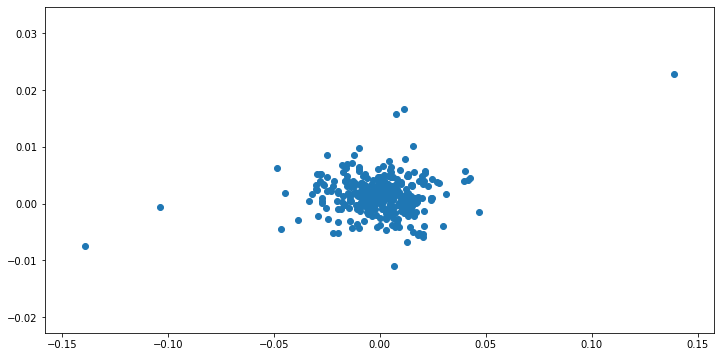

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(y_teste,p)

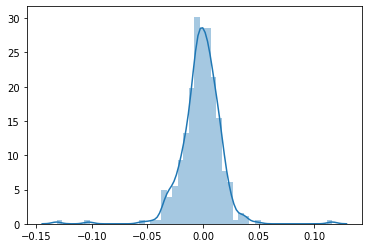

In [9]:
sns.distplot(y_teste-p)

In [10]:
result['Predição'] = p
result['Acertou'] = np.select([result['alvo'] * result['Predição'] > 0], [1], default=0)
result.head()

,alvo,Predição,Acertou
Date,,,
2018-06-08,-0.008692,0.002264,0
2016-08-12,0.014546,-0.000233,0
2016-05-12,-0.026990,0.000126,0
2018-07-02,0.011367,-0.001259,0
2019-06-14,-0.004253,0.003182,0


In [11]:
acc = np.mean(result['Acertou']==1)

print("acurácia",acc)

acurácia 0.4604904632152589
